# Recall Machine Learning General Workflow

* Training: 
    <li> Collect and Label Data </li>
    <li> Extract Features </li>
    <li> Select and Train a Model </li>
    
* Testing:
     <li> Extract (same) Features on Test data </li>
     <li> Apply trained model</li>
     

* <emph>Lets first discuss selecting and training a model.  </emph>

<img src="figures/modeling.png" style="width: 500px;"/>
-<a href="https://twitter.com/DarceyNLP/status/1425484082478264327?s=20">Source link: Twitter</a>

* In terms of selecting a model, usually the simplest model that works is best.  Model selection is still very much an open problem. We will cover several models in this course.  Best practice for model selection is driven primarily by good experimental design and testing. 
<img src="figures/KISS.png"  style="width: 500px;"/>
-<a href="https://twitter.com/autobencoder/status/1425839428254277636?s=20 ">Source link: Twitter</a>


* Once you have selected a model, you need to train it.  Parts of learning/training a model can be summarized by the following slide: 
<img src="figures/parts_of_learning.png"  style="width: 700px;"/>
-<a href="https://twitter.com/mdekstrand/status/1373400822470504451?s=20">Source link: M. Ekstrand on Twitter</a>

# Polynomial Curve Fitting Example

* Lets begin by considering the polynomial curve fitting example in the first chapter of the text. 
* Suppose we have a training set with $N$ data samples, $\mathbf{x} = (x_1, x_2, \ldots, x_N)^T$ and corresponding desired outputs $\mathbf{t} = (t_1, t_2, \ldots, t_N)^T$ where sample $x_i$ has the desired label $t_i$

* We generally organize data into *vectors* and *matrices*. Not only is it a common way to organize the data, but it allows us to easily apply linear algebraic operations during analysis.


* Suppose the data actually came from some unknown hidden function. 
* In practice/application, we only have the training data and its corresponding desired values (both of which may be noisy).  From this training data, we want to learn a mapping from input values $x$ to the desired output values $t$. 
* If we knew the hidden function, we would not need to learn the mapping - we would already know it.  However, since we do not know the true underlying function, we need to do our best to estimate from the examples of input-output pairs that we have.
* We will learn (i.e., train a model to estimate) that mapping from the training data $\left\{ \mathbf{x}, \mathbf{t} \right\}$. 
* Then, when we are given test data, we can predict each test data point's $t$ value using the mapping that we estimated. 

* For this problem, we assume that the original data $x$ is sufficient and appropriate (so, we do not need to preprocess or extract features).  Then, we have completed steps 1 and 2 of the general approach listed in Section 0 above.

* Now we must assume a model.  Lets assume a polynomial function as our model (following the example in the text):  
\begin{eqnarray}
y(x,\mathbf{w}) = w_0 + w_1x + w_2x^2 + \ldots + w_Mx^M = \sum_{j=0}^M w_jx^j
\end{eqnarray}

* Now we must *train* this model by estimating the unknown parameters ($\mathbf{w}$) that maps the training data, $\mathbf{x}$, to their desired values, $\mathbf{t}$, given some assumed value for $M$

* So, we have $N$ discrete points from which to estimate $\mathbf{w}$.  We can minimize the squared error to estimate the parameters:
	\begin{eqnarray}
		\arg \min_\mathbf{w} E(\mathbf{w}) &=& \frac{1}{2} \sum_{n=1}^N \left( y(x_n, \mathbf{w}) - t_n\right)^2\\
		&=& \frac{1}{2} \sum_{n=1}^N \left(\sum_{j=0}^M w_jx_n^j -t_n \right)^2
	 \end{eqnarray}
* Consider the following illustration of the error function: 
<img src="figures/fig1.jpg"  style="width: 200px;"/>
The red lines correspond to the error between the data and the functional approximation.  

*  We can write the error function compactly in matrix/vector form: 
	 \begin{eqnarray} \nonumber
	 	E(\mathbf{w}) &=& \frac{1}{2} \left( \left[w_0, w_1, \ldots, w_M \right] \left[ \begin{array}{c c c c} 1 & 1 & \ldots & 1\\ x_1 & x_2 & \ldots & x_N \\  x_1^2 & x_2^2 & \ldots & x_N^2 \\ \vdots & \vdots & \ddots & \vdots \\  x_1^M & x_2^M & \ldots & x_N^M \end{array}\right] - \left[ t_1, t_2, \ldots, t_N\right]\right)\\
	 	& & \left( \left[w_0, w_1, \ldots, w_M \right] \left[ \begin{array}{c c c c} 1 & 1 & \ldots & 1\\ x_1 & x_2 & \ldots & x_N \\  x_1^2 & x_2^2 & \ldots & x_N^2 \\ \vdots & \vdots & \ddots & \vdots \\  x_1^M & x_2^M & \ldots & x_N^M \end{array}\right]- \left[ t_1, t_2, \ldots, t_N\right]\right)^T \nonumber\\
        &=& \frac{1}{2}  \left( \mathbf{w}^T\mathbf{X}^T - \mathbf{t}^T\right)\left( \mathbf{w}^T\mathbf{X}^T - \mathbf{t}^T\right)^T\\
        &=& \frac{1}{2}\left\| \mathbf{w}^T\mathbf{X}^T - \mathbf{t}^T \right\|_2^2
	 \end{eqnarray}
     where  
     \begin{eqnarray}\mathbf{X}^T &=& \left[ \begin{array}{c c c c} 1 & 1 & \ldots & 1\\ x_1 & x_2 & \ldots & x_N \\  x_1^2 & x_2^2 & \ldots & x_N^2 \\ \vdots & \vdots & \ddots & \vdots \\  x_1^M & x_2^M & \ldots & x_N^M \end{array}\right]\\
     &=& \left[ \mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_N\right]
     \end{eqnarray}
    and
    \begin{eqnarray}\mathbf{x}_i = \left[x_i^0, x_i^1, x_i^2, \ldots, x_i^M \right]^T \end{eqnarray}

* So, we want $E(\mathbf{w})$ to be small.  How do we solve for $\mathbf{w}$?
* We can take the derivative of the error function, set it to zero, and solve for the parameters.  In general, this method does not guarantee that the parameters we estimate are minima of the error function (e.g., may be an inflection point, maxima).  It is a necessary condition (but not sufficient). However, if the function is convex, then it will always find the global optima. 

* How do we take the derivative of a function with respect to a vector? 
	 \begin{equation*}
\frac{\partial}{\partial \mathbf{x}}f(\mathbf{x}) =\! \left[\frac{\partial}{\partial x_1}f(\mathbf{x}),\frac{\partial}{\partial x_2}f(\mathbf{x}),\ldots,\frac{\partial}{\partial x_n}f(\mathbf{x})\right]^\top\!\!\in\! \mathcal{R}^{n \times 1}.
\end{equation*}

* So, what would the derivative of $E(\mathbf{w})$ be with respect to $\mathbf{w}$? 
\begin{eqnarray}
 E(\mathbf{w}) &=& \frac{1}{2} \sum_{n=1}^N \left(\sum_{j=0}^M w_jx_n^j -t_n \right)^2\\
\frac{\partial E(\mathbf{w})}{\partial \mathbf{w}} &=& \left[ \frac{\partial E(\mathbf{w})}{\partial w_0},  \frac{\partial E(\mathbf{w})}{\partial w_1}, \ldots,  \frac{\partial E(\mathbf{w})}{\partial w_M} \right]^T\\
&=& \left[ \sum_{n=1}^N \left( \sum_{j=0}^M w_jx_n^j -t_n \right)x_n^0 ,  \sum_{n=1}^N \left(  \sum_{j=0}^M w_jx_n^j -t_n \right)x_n^1 , \ldots, \sum_{n=1}^N \left(  \sum_{j=0}^M w_jx_n^j -t_n \right)x_n^M  \right]^T  \nonumber
\end{eqnarray}

* Similarly, 
\begin{eqnarray}
		  \frac{\partial E(\mathbf{w})}{\partial \mathbf{w}} &=& \left[\frac{1}{2} 2 \left( \mathbf{w}^T\mathbf{X}^T - \mathbf{t}^T\right)\mathbf{X}\right]^T
	 \end{eqnarray}
	where $\mathbf{X}^T= \left[ \begin{array}{c c c c} 1 & 1 & \ldots & 1\\ x_1 & x_2 & \ldots & x_N \\  x_1^2 & x_2^2 & \ldots & x_N^2 \\ \vdots & \vdots & \ddots & \vdots \\  x_1^M & x_2^M & \ldots & x_N^M \end{array}\right]$.
* Then, we can set the derivative to zero and solve: 
\begin{eqnarray}
		 & & 0 = \mathbf{X}^T\mathbf{X}\mathbf{w} - \mathbf{X}^T\mathbf{t}\\
		 & & \mathbf{X}^T\mathbf{t} = \mathbf{X}^T\mathbf{X}\mathbf{w} \\
		 & & \mathbf{w} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t}
	 \end{eqnarray}


* Let's look at this more closely, suppose M = 2 and N = 2: 
\begin{eqnarray} \nonumber
	 	E(\mathbf{w}) &=& \frac{1}{2} \left( \left[w_0, w_1, w_2 \right] \left[ \begin{array}{c c c c} 1 & 1 \\ x_1 & x_2  \\  x_1^2 & x_2^2  \end{array}\right] - \left[ t_1, t_2 \right]\right) \left( \left[w_0, w_1, w_2 \right] \left[ \begin{array}{c c c c} 1 & 1 \\ x_1 & x_2  \\  x_1^2 & x_2^2  \end{array}\right] - \left[ t_1, t_2 \right]\right)^T \nonumber \\
	 	&=&  \frac{1}{2}\left( \left[ w_0 + w_1x_1 + w_2x_1^2, w_0 + w_1x_2 + w_2x_2^2 \right]  - \left[ t_1, t_2 \right]\right) \nonumber\\
	 	& & \left( \left[ w_0 + w_1x_1 + w_2x_1^2, w_0 + w_1x_2 + w_2x_2^2 \right]  - \left[ t_1, t_2 \right]\right)^T \nonumber\\
	 	&=&  \frac{1}{2}\left( \left[ w_0 + w_1x_1 + w_2x_1^2 - t_1, w_0 + w_1x_2 + w_2x_2^2  - t_2\right] \right)\nonumber\\
	 	& & \left( \left[ w_0 + w_1x_1 + w_2x_1^2 -t_1, w_0 + w_1x_2 + w_2x_2^2 -t_2 \right] \right)^T \nonumber\\
	 	&=& \frac{1}{2}  \left( \left(w_0 + w_1x_1 + w_2x_1^2 - t_1\right)^2 +\left(w_0 + w_1x_2 + w_2x_2^2 -t_2\right)^2 \right) \nonumber
	 \end{eqnarray}
* Then, let us work out the derivative with respect to the vector $\mathbf{w}$
\begin{eqnarray} \nonumber
	 	\frac{\partial E(\mathbf{w})}{\partial \mathbf{w}} &=& \left[\frac{\partial E(\mathbf{w})}{\partial {w}_0}, \frac{\partial E(\mathbf{w})}{\partial {w}_1}, \frac{\partial E(\mathbf{w})}{\partial {w}_2} \right]^T\nonumber\\
	 	%derivative with w_0
	 	&=& \left[\frac{1}{2}\left( 2\left(w_0 + w_1x_1 + w_2x_1^2 - t_1\right)  + 2\left(w_0 + w_1x_2 + w_2x_2^2 -t_2\right) \right), \right. \nonumber\\
	 	%derivative with w_1
		& & \frac{1}{2}\left( 2\left(w_0 + w_1x_1 + w_2x_1^2 - t_1\right)x_1   + 2\left(w_0 + w_1x_2 + w_2x_2^2 -t_2\right)x_2 \right),  \nonumber\\
	 	%derivative with w_2
		& & \frac{1}{2}\left( 2\left(w_0 + w_1x_1 + w_2x_1^2 - t_1\right)x_1^2 + \left. 2\left(w_0 + w_1x_2 + w_2x_2^2 -t_2\right)x_2^2 \right) \right]^T \nonumber\\
		&=& \frac{1}{2} 2 \left[ \begin{array}{c c c c} 1 & 1 \\ x_1 & x_2  \\  x_1^2 & x_2^2  \end{array}\right]\left(  \left[w_0, w_1, w_2 \right] \left[ \begin{array}{c c c c} 1 & 1 \\ x_1 & x_2  \\  x_1^2 & x_2^2  \end{array}\right] - \left[ t_1, t_2 \right] \right)^T
	 \end{eqnarray}



Thus, 
\begin{eqnarray}
		 & & 0 =  \left( \mathbf{w}^T\mathbf{X}^T - \mathbf{t}^T\right)\mathbf{X}\\
        & & 0 =   \mathbf{w}^T\mathbf{X}^T\mathbf{X} - \mathbf{t}^T\mathbf{X}\\        
        & & \mathbf{t}^T\mathbf{X} = \mathbf{w}^T\mathbf{X}^T\mathbf{X}\\
        & & \mathbf{t}^T\mathbf{X}\left(\mathbf{X}^T\mathbf{X}\right)^{-1} = \mathbf{w}^T\mathbf{X}^T\mathbf{X}
        \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\\
         & &\mathbf{t}^T\mathbf{X}\left(\mathbf{X}^T\mathbf{X}\right)^{-1} = \mathbf{w}^T\\
         & &\mathbf{w} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t}\\
\end{eqnarray}



## Apply to data generated from a (noisy) sine curve 
* Suppose our data actually came from: $t = \sin(2\pi x) + \epsilon$ where $\epsilon$ is Gaussian zero-mean random noise. 
* The univariate Gaussian Distribution: 
	\begin{eqnarray}
		\mathcal{N}(x | \mu, \sigma^2) = \frac{1}{(2\pi \sigma^2)^{1/2}} \exp\left\{ - \frac{1}{2\sigma^2}(x - \mu)^2\right\}
	\end{eqnarray}

<img src="figures/fig2.jpg"  style="width: 200px;"/>

* If the noise is zero-mean Gaussian distributed, it is like we are saying there is a Gaussian around the true curve: 

<img src="figures/fig3.jpg"  style="width: 200px;"/>

\begin{eqnarray}
		 t = y + \epsilon\\
		 \epsilon = t - y
	 \end{eqnarray}
	 where
	 \begin{eqnarray}
	 	\epsilon \sim \mathcal{N}(0, \sigma^2)
 	 \end{eqnarray}
 	 thus
 	 \begin{eqnarray}
 	 	\mathcal{N}(t-y|0,1) &\propto& \exp\left\{ -\frac{1}{2} \frac{(t-y-0)^2}{1^2} \right\}\\
 	 	&=& \exp\left\{ -\frac{1}{2} (t-y)^2 \right\}\\
 	 	&=&  \exp\left\{ -E(\mathbf{w}) \right\}
 	\end{eqnarray}

* So, the squared error objective function, $E(\mathbf{w})$, assumes Gaussian noise. 
* Another way to look at it: $t$ is distributed according to a Gaussian distribution with mean $y$

* Also, *What is the multivariate Gaussian distribution?*

* First, lets generate data from the *true* underlying function (which, in practice, we would not know)


In [1]:
# %load ../HelperCode/generateUniformData.py
import numpy as np
import math 

def generateUniformData(N, l, u, gVar):
	'''generateUniformData(N, l, u, gVar): Generate N uniformly spaced data points 
    in the range [l,u) with zero-mean Gaussian random noise with standard deviation gVar'''
	# x = np.random.uniform(l,u,N)
	step = (u-l)/(N)
	x = np.arange(l+step/2,u+step/2,step)
	e = np.random.normal(0,gVar,N)
	t = np.sin(2*math.pi*x) + e
	return x,t


* Lets plot this data and the underlying *true* function

In [2]:
# %load ../HelperCode/plotData.py
import matplotlib.pyplot as plt
def plotData(x1,t1,x2,t2,x3=None,t3=None,legend=[]):

    #plot everything
    p1 = plt.plot(x1, t1, 'bo') #plot training data
    p2 = plt.plot(x2, t2, 'g') #plot true value
    if(x3 is not None):
        p3 = plt.plot(x3, t3, 'r') 

    #add title, legend and axes labels
    plt.ylabel('t') #label x and y axes
    plt.xlabel('x')
    
    if(x3 is None):
        plt.legend((p1[0],p2[0]),legend)
    else:
        plt.legend((p1[0],p2[0],p3[0]),legend)


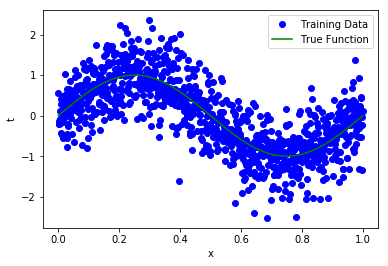

In [19]:
import matplotlib.pyplot as plt
import textwrap
%matplotlib inline

l = 0
u = 1
N = 1000
gVar = .5
data_uniform  = np.array(generateUniformData(N, l, u, gVar)).T

x1 = data_uniform[:,0]
t1 = data_uniform[:,1]

x2 = np.arange(l,u,0.001)  #get equally spaced points in the xrange
t2 = np.sin(2*math.pi*x2) #compute the true function value
    
fig = plt.figure()
plotData(x1, t1, x2, t2,legend=['Training Data', 'True Function'])

* Now lets fit the data using the polynomial curve fitting approach

array([ 2.14299030e-02,  2.59606579e+00,  6.49221556e+01, -5.60044782e+02,
        2.27939990e+03, -5.83763988e+03,  9.27204980e+03, -8.67957954e+03,
        4.37730519e+03, -9.19070570e+02])

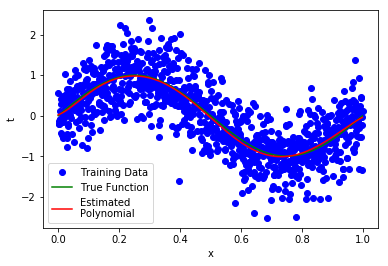

In [22]:
def fitdata(x,t,M):
	'''fitdata(x,t,M): Fit a polynomial of order M to the data (x,t)'''	
	#This needs to be filled in
	X = np.array([x**m for m in range(M+1)]).T
	w = np.linalg.inv(X.T@X)@X.T@t
	return w

        
M = 9
w = fitdata(x1,t1,M)
xrange = np.arange(l,u,0.001)  #get equally spaced points in the xrange
X = np.array([xrange**m for m in range(w.size)]).T  #extract the same features on test data
esty = X@w #compute the predicted value
plotData(x1,t1,x2,t2,xrange,esty,['Training Data', 'True Function', 'Estimated\nPolynomial'])
w